In [3]:
import os
import sys
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pickle

In [4]:
pkl_file1 = "Z:/SynthesEyes/data/RGB/labeldata/f01/f01_36_0.1963_-0.7854.pkl"
pkl_file2 = "Z:/SynthesEyes/data/RGB/labeldata/f01/f01_42_-0.0000_-0.1963.pkl"

# Load the data from the .pkl file
with open(pkl_file1, 'rb') as file:
    loaded_data = pickle.load(file)

print(loaded_data)

{'ldmks': {'ldmks_pupil_2d': [(68.49550008773804, 28.230924606323242), (71.28152847290039, 30.265145301818848), (73.95526170730591, 28.94824981689453), (74.95043992996216, 25.051755905151367), (73.68412971496582, 20.85822105407715), (70.89816570281982, 18.82415771484375), (68.22449684143066, 20.140910148620605), (67.22925424575806, 24.037280082702637)], 'ldmks_iris_3d': [(-0.673625648021698, 1.2611634731292725, 3.1976213455200195), (-0.7002992630004883, 1.2303123474121094, 3.232454299926758), (-0.7471112012863159, 1.204142451286316, 3.2318243980407715), (-0.7866395711898804, 1.197983741760254, 3.1961004734039307), (-0.7957292199134827, 1.2154439687728882, 3.146209239959717), (-0.7690556049346924, 1.2462952136993408, 3.1113762855529785), (-0.7222437858581543, 1.2724649906158447, 3.112006187438965), (-0.6772223711013794, 1.278803825378418, 3.144634485244751)], 'ldmks_lids_2d': [(29.067360162734985, 49.65967416763306), (35.06073832511902, 40.559818744659424), (47.294636964797974, 31.07261

In [7]:
print(loaded_data['ldmks']['ldmks_pupil_2d'])

[(68.49550008773804, 28.230924606323242), (71.28152847290039, 30.265145301818848), (73.95526170730591, 28.94824981689453), (74.95043992996216, 25.051755905151367), (73.68412971496582, 20.85822105407715), (70.89816570281982, 18.82415771484375), (68.22449684143066, 20.140910148620605), (67.22925424575806, 24.037280082702637)]


In [107]:
import pandas as pd
import pickle

# Load data from the pickle file
with open(pkl_file1, 'rb') as file:
    data = pickle.load(file)

# Extract the 'look_vec' column and create a DataFrame
look_vec_x = data["look_vec"][0:1]
look_vec_y = data["look_vec"][1:2]

# Create a DataFrame
df = pd.DataFrame({'look_vec_x': look_vec_x, 'look_vec_y': look_vec_y})

# Display the resulting DataFrame
df


,look_vec_x,look_vec_y
0,0.744168,-0.122472


# VOLUME 측정

In [57]:
def count_png_files(folder_path):
    png_count = 0

    # Iterate over all files in the folder
    for file_name in os.listdir(folder_path):
        # Check if the file has a ".jpg" extension (case-insensitive)
        if file_name.lower().endswith(".png"):
            png_count += 1

    return png_count

def count_png_files_in_folders(base_folder):
    # Dictionary to store JPEG file counts for each folder
    folder_png_counts = {}
    total_png_count = 0

    # Iterate over folders in the specified range
    for folder_name in os.listdir(base_folder):
        # Create the absolute path for the folder
        folder_path = os.path.join(base_folder, folder_name)

        # Check if the folder exists
        if os.path.exists(folder_path):
            # Count JPEG files in the folder
            png_count = count_png_files(folder_path)

            # Store folder name and JPEG file count in the dictionary
            folder_png_counts[folder_name] = png_count

            # Update total count
            total_png_count += png_count

            # Print the result
            print(f"Folder '{folder_name}' png file count: {png_count}")
        else:
            print(f"Folder '{folder_name}' does not exist.")

    # Print the total count
    print(f"\nTotal png file count for all folders: {total_png_count}")

    return folder_png_counts

# Specify the path to the base folder
base_folder_path = "nsmount/SynthesEyes/SynthEyes_data"

# Call the function to count JPEG files for each existing folder in the range
folder_png_counts = count_png_files_in_folders(base_folder_path)

Folder 'f01' png file count: 1170
Folder 'f02' png file count: 1259
Folder 'f03' png file count: 1137
Folder 'f04' png file count: 1076
Folder 'f05' png file count: 1191
Folder 'm01' png file count: 1145
Folder 'm02' png file count: 1115
Folder 'm03' png file count: 1167
Folder 'm04' png file count: 999
Folder 'm05' png file count: 1123

Total png file count for all folders: 11382


# 이미지 정보 확인

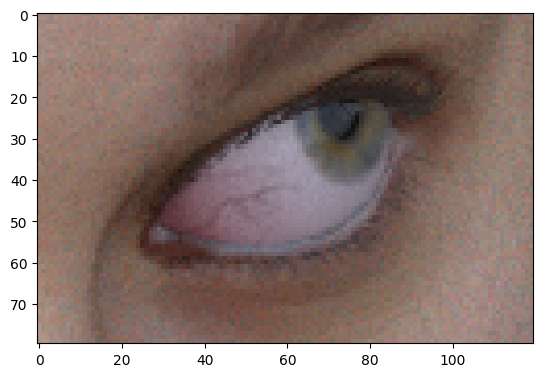

In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load your image (replace 'your_image.jpg' with the actual image file)
image = cv2.imread("nsmount/SynthesEyes/SynthEyes_data/f01/f01_36_0.1963_-0.7854.png")

# Convert BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.show()

In [53]:
print("이미지 크기:", image.shape)  # (높이, 너비, 채널)
print("이미지 데이터 타입:", image.dtype)  # 픽셀 데이터 타입
print("픽셀 값 (좌상단 픽셀):", image[0, 0])  # 좌상단 픽셀의 BGR 값

이미지 크기: (80, 120, 3)
이미지 데이터 타입: uint8
픽셀 값 (좌상단 픽셀): [123 138 162]


# 3D 시선 벡터 시각화

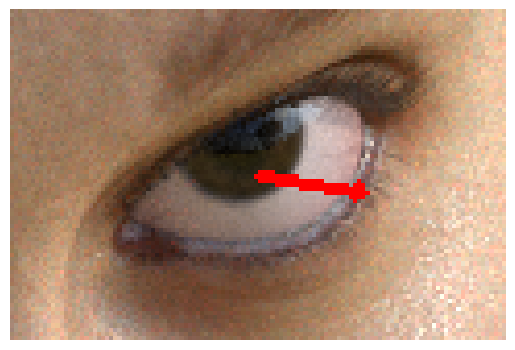

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load your image (replace 'your_image.jpg' with the actual image file)
image = cv2.imread("nsmount/SynthesEyes/SynthEyes_data/f01/f01_42_-0.0000_-0.1963.png")

# Gaze vector
gaze_vector = np.array([0.25338634848594666, 0.04143051430583, -0.9664775729179382])

# Image center
image_center = (image.shape[1] // 2, image.shape[0] // 2)

# Scaling factor for visualization (you may need to adjust this based on your image size)
scale_factor = 100

# Calculate the endpoint of the arrow based on the gaze vector
arrow_endpoint = tuple((np.array(image_center) + scale_factor * gaze_vector[:2]).astype(int))

# Draw arrow on the image
image_with_arrow = cv2.arrowedLine(image.copy(), image_center, arrow_endpoint, (0, 0, 255), 2)

# Convert BGR image to RGB for matplotlib
image_with_arrow_rgb = cv2.cvtColor(image_with_arrow, cv2.COLOR_BGR2RGB)

# Display the image with the arrow using plt
plt.imshow(image_with_arrow_rgb)
plt.axis('off')
plt.show()

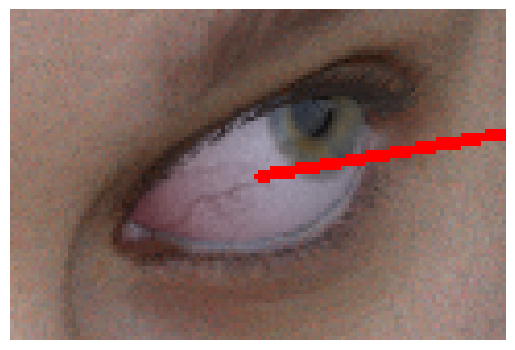

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load your image (replace 'your_image.jpg' with the actual image file)
image = cv2.imread("nsmount/SynthesEyes/SynthEyes_data/f01/f01_36_0.1963_-0.7854.png")

# Gaze vector
gaze_vector = np.array([0.744168221950531, -0.12247157096862793, -0.6566691398620605])

# Image center
image_center = (image.shape[1] // 2, image.shape[0] // 2)

# Scaling factor for visualization (you may need to adjust this based on your image size)
scale_factor = 100

# Calculate the endpoint of the arrow based on the gaze vector
arrow_endpoint = tuple((np.array(image_center) + scale_factor * gaze_vector[:2]).astype(int))

# Draw arrow on the image
image_with_arrow = cv2.arrowedLine(image.copy(), image_center, arrow_endpoint, (0, 0, 255), 2)

# Convert BGR image to RGB for matplotlib
image_with_arrow_rgb = cv2.cvtColor(image_with_arrow, cv2.COLOR_BGR2RGB)

# Display the image with the arrow using plt
plt.imshow(image_with_arrow_rgb)
plt.axis('off')
plt.show()

# 눈꺼풀, 동공, 홍채 랜드마크 시각화 

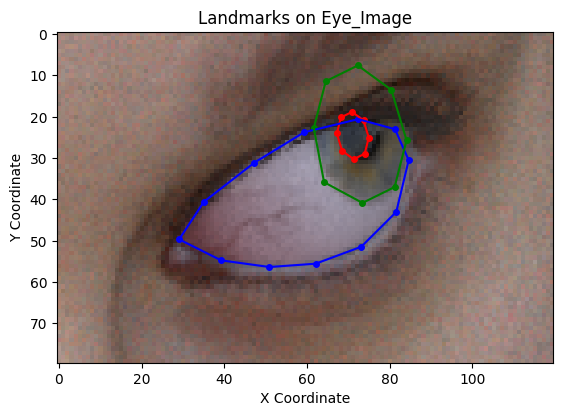

In [48]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Pupil landmark data
pupil_landmarks = [
    (68.49550008773804, 28.230924606323242),
    (71.28152847290039, 30.265145301818848),
    (73.95526170730591, 28.94824981689453),
    (74.95043992996216, 25.051755905151367),
    (73.68412971496582, 20.85822105407715),
    (70.89816570281982, 18.82415771484375),
    (68.22449684143066, 20.140910148620605),
    (67.22925424575806, 24.037280082702637)
]

lids_landmarks = [
    (29.067360162734985, 49.65967416763306), 
    (35.06073832511902, 40.559818744659424), 
    (47.294636964797974, 31.072611808776855), 
    (59.335609674453735, 23.736085891723633), 
    (72.40762710571289, 20.565567016601562), 
    (81.3030481338501, 23.00884246826172), 
    (84.60619926452637, 30.49783706665039), 
    (81.60176753997803, 43.02255153656006), 
    (73.12979221343994, 51.442809104919434), 
    (62.0797061920166, 55.544676780700684), 
    (50.91676354408264, 56.34313344955444), 
    (39.232531785964966, 54.735107421875)
]

iris_landmarks = [
    (61.65026664733887, 22.73038387298584),
    (64.54386234283447, 11.405439376831055),
    (72.31542348861694, 7.578072547912598),
    (80.4124116897583, 13.490300178527832),
    (84.09177303314209, 25.678772926330566),
    (81.19817733764648, 37.00367450714111), 
    (73.42663764953613, 40.83102226257324),
    (64.13939952850342, 35.82379341125488)
]



# Load your image (replace 'your_image.jpg' with the actual image file)
image_path = "nsmount/SynthesEyes/SynthEyes_data/f01/f01_36_0.1963_-0.7854.png"
image = Image.open(image_path)

# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(image, origin = 'lower')

# Plot landmarks on the image
for landmark in pupil_landmarks:
    ax.plot(landmark[0], landmark[1], marker='o', markersize=4, color='red')

for landmark in lids_landmarks:
    ax.plot(landmark[0], landmark[1], marker='o', markersize=4, color='blue')

for landmark in iris_landmarks:
    ax.plot(landmark[0], landmark[1], marker='o', markersize=4, color='green')

# Connect the landmarks with lines
ax.plot(*zip(*pupil_landmarks, pupil_landmarks[0]), color='red')
ax.plot(*zip(*lids_landmarks, lids_landmarks[0]), color='blue')
ax.plot(*zip(*iris_landmarks, iris_landmarks[0]), color='green')
    
# Set labels and title
ax.set_title('Landmarks on Eye_Image')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')

# Invert y-axis to match image coordinates
ax.invert_yaxis()

# Display the plot
plt.show()

# 데이터 분석

In [108]:
import pandas as pd
import pickle

base_path =  "nsmount/SynthesEyes/SynthEyes_data"

# Initialize an empty DataFrame to store the combined data
total_label_data = pd.DataFrame()

# Example usage:
#for file_name in tqdm(os.listdir(base_path), desc="processing Image files"):
for folder_name in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder_name)
    
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        # Check if the file is a .label file
        if file_name.endswith(".pkl"):
            # Load data from the pickle file
            with open(file_path, 'rb') as file:
                data = pickle.load(file)

            # Extract the 'look_vec' column and create a DataFrame
            look_vec_x = data["look_vec"][0:1]
            look_vec_y = data["look_vec"][1:2]
            
            # Create a DataFrame
            label_data = pd.DataFrame({'look_vec_x': look_vec_x, 'look_vec_y': look_vec_y})
            
            # Concatenate the data to the total_label_data DataFrame
            total_label_data = pd.concat([total_label_data, label_data], ignore_index=True)

# Display the combined DataFrame
total_label_data

,look_vec_x,look_vec_y
0,-0.399155,-0.147319
1,-0.212617,-0.155279
2,-0.017909,-0.157271
3,0.177488,-0.153221
4,-0.571396,0.029006
...,...,...
11377,-0.558585,0.351681
11378,-0.198649,0.415299
11379,-0.003631,0.423636
11380,0.379327,0.391774


In [110]:
# Convert radians to degrees
total_label_data['look_vec_x_deg'] = np.degrees(total_label_data['look_vec_x'])
total_label_data['look_vec_y_deg'] = np.degrees(total_label_data['look_vec_y'])

## joint plot

### total

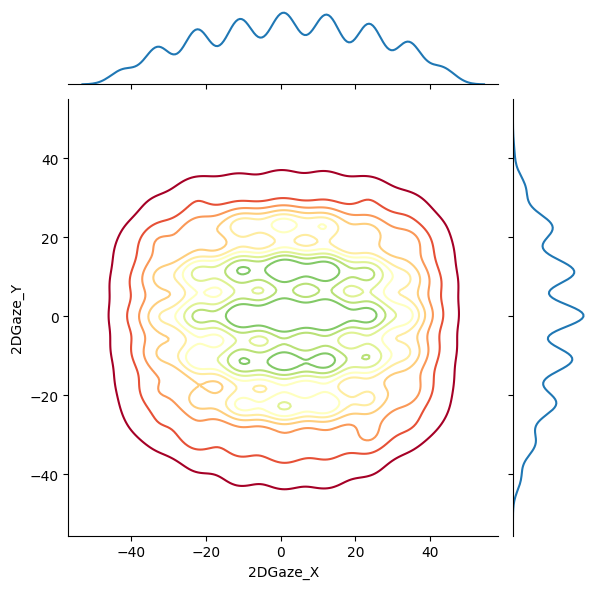

<Figure size 1600x1200 with 0 Axes>

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'total_label_data' DataFrame is already created from your previous code

# Plotting the jointplot
sns.jointplot(data=total_label_data, x='look_vec_x_deg', y='look_vec_y_deg', kind='kde', cmap='RdYlGn')
plt.xlabel('2DGaze_X',fontsize=10)
plt.ylabel('2DGaze_Y',fontsize=10)
plt.figure(figsize=(16, 12))
plt.show()

### female

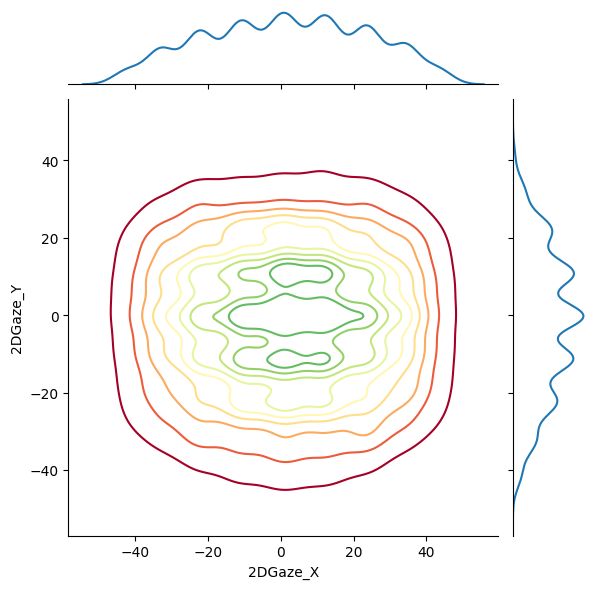

<Figure size 1600x1200 with 0 Axes>

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'total_label_data' DataFrame is already created from your previous code

# Plotting the jointplot
sns.jointplot(data=total_label_data[0:int(len(total_label_data)/2)], x='look_vec_x_deg', y='look_vec_y_deg', kind='kde', cmap='RdYlGn')
plt.xlabel('2DGaze_X',fontsize=10)
plt.ylabel('2DGaze_Y',fontsize=10)
plt.figure(figsize=(16, 12))
plt.show()

### male

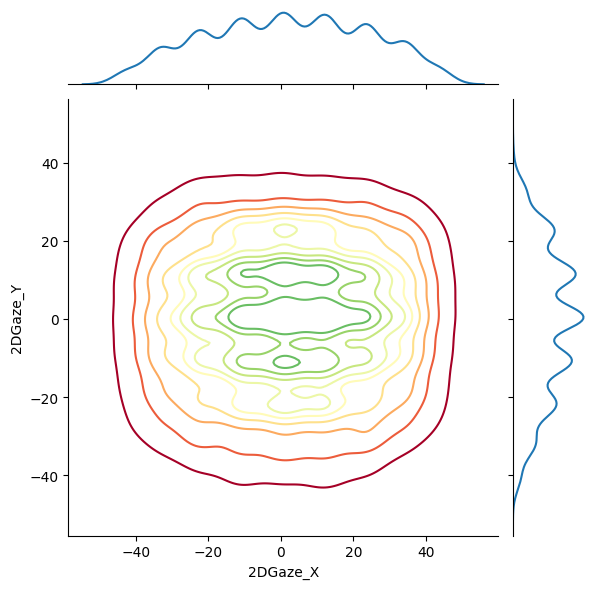

<Figure size 1600x1200 with 0 Axes>

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'total_label_data' DataFrame is already created from your previous code

# Plotting the jointplot
sns.jointplot(data=total_label_data[int(len(total_label_data)/2):], x='look_vec_x_deg', y='look_vec_y_deg', kind='kde', cmap='RdYlGn')
plt.xlabel('2DGaze_X',fontsize=10)
plt.ylabel('2DGaze_Y',fontsize=10)
plt.figure(figsize=(16, 12))
plt.show()

## heat_map

### total

<Figure size 1600x1200 with 0 Axes>

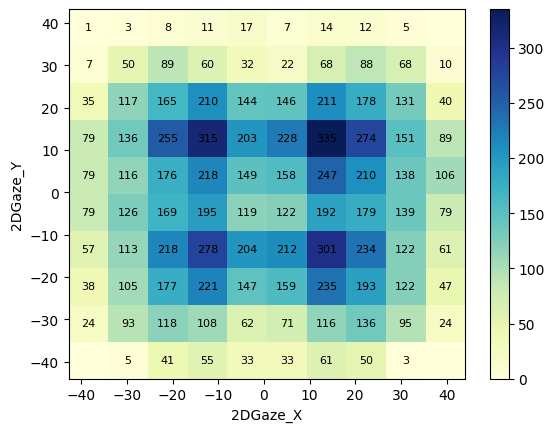

<Figure size 1600x1200 with 0 Axes>

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'total_label_data' DataFrame is already created from your previous code

cmap = sns.color_palette("YlGnBu", as_cmap=True)

# Create a 2D histogram with annotations
hist_data, x_edges, y_edges, im = plt.hist2d(total_label_data['look_vec_x_deg'], total_label_data['look_vec_y_deg'], bins=10, cmap=cmap)

# Annotate each bin with its count
for i in range(len(x_edges) - 1):
    for j in range(len(y_edges) - 1):
        count = int(hist_data[i, j])
        if count > 0:
            x_center = (x_edges[i] + x_edges[i + 1]) / 2
            y_center = (y_edges[j] + y_edges[j + 1]) / 2
            if count > 30000 : 
                plt.text(x_center, y_center, str(count), color='white',
                    ha='center', va='center', fontsize=8)
            else :
                plt.text(x_center, y_center, str(count), color='black',
                    ha='center', va='center', fontsize=8)
# Add a color bar
cbar = plt.colorbar(im)

plt.xlabel('2DGaze_X',fontsize=10)
plt.ylabel('2DGaze_Y',fontsize=10)
plt.figure(figsize=(16, 12))


### female

<Figure size 1600x1200 with 0 Axes>

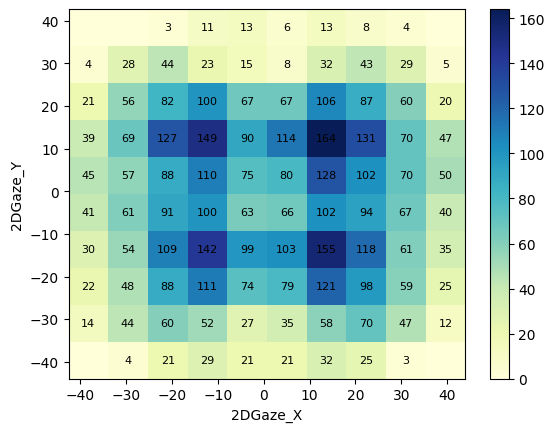

<Figure size 1600x1200 with 0 Axes>

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'total_label_data' DataFrame is already created from your previous code

cmap = sns.color_palette("YlGnBu", as_cmap=True)

# Create a 2D histogram with annotations
hist_data, x_edges, y_edges, im = plt.hist2d(total_label_data['look_vec_x_deg'][0:int(len(total_label_data)/2)], total_label_data['look_vec_y_deg'][0:int(len(total_label_data)/2)], bins=10, cmap=cmap)
# Annotate each bin with its count
for i in range(len(x_edges) - 1):
    for j in range(len(y_edges) - 1):
        count = int(hist_data[i, j])
        if count > 0:
            x_center = (x_edges[i] + x_edges[i + 1]) / 2
            y_center = (y_edges[j] + y_edges[j + 1]) / 2
            if count > 30000 : 
                plt.text(x_center, y_center, str(count), color='white',
                    ha='center', va='center', fontsize=8)
            else :
                plt.text(x_center, y_center, str(count), color='black',
                    ha='center', va='center', fontsize=8)
# Add a color bar
cbar = plt.colorbar(im)

plt.xlabel('2DGaze_X',fontsize=10)
plt.ylabel('2DGaze_Y',fontsize=10)
plt.figure(figsize=(16, 12))


### male

<Figure size 1600x1200 with 0 Axes>

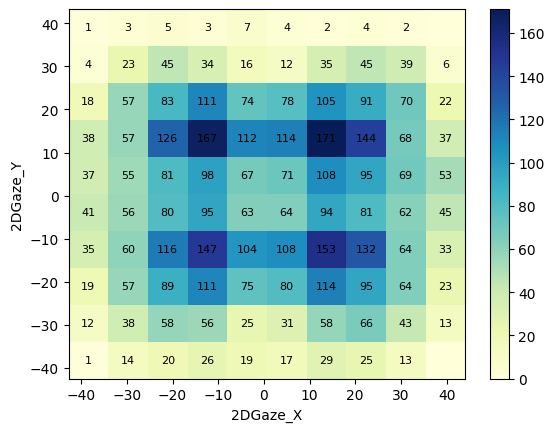

<Figure size 1600x1200 with 0 Axes>

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'total_label_data' DataFrame is already created from your previous code

cmap = sns.color_palette("YlGnBu", as_cmap=True)

# Create a 2D histogram with annotations
hist_data, x_edges, y_edges, im = plt.hist2d(total_label_data['look_vec_x_deg'][int(len(total_label_data)/2):], total_label_data['look_vec_y_deg'][int(len(total_label_data)/2):], bins=10, cmap=cmap)

# Annotate each bin with its count
for i in range(len(x_edges) - 1):
    for j in range(len(y_edges) - 1):
        count = int(hist_data[i, j])
        if count > 0:
            x_center = (x_edges[i] + x_edges[i + 1]) / 2
            y_center = (y_edges[j] + y_edges[j + 1]) / 2
            if count > 30000 : 
                plt.text(x_center, y_center, str(count), color='white',
                    ha='center', va='center', fontsize=8)
            else :
                plt.text(x_center, y_center, str(count), color='black',
                    ha='center', va='center', fontsize=8)
# Add a color bar
cbar = plt.colorbar(im)

plt.xlabel('2DGaze_X',fontsize=10)
plt.ylabel('2DGaze_Y',fontsize=10)
plt.figure(figsize=(16, 12))
